# R results

(c) Anna-Lena Eckert

Interpreting txt files output

I implemented a logistic model on the complete datasets (not sub-divided into subject datafiles, but with a random intercept per subject) in R using the glmer from the lme package (see incremental_R.R). Here I am reading and plotting the results with Python. 

In [1]:
import os, sys, glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# dataframe inspection
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Fixed effects

This is the acutally interesting part of the analysis in R: looking at average fixed effects and compare them between the visual and auditory dataset.

In [2]:
# now get fixed effects going

def get_fixed_effects_R(path): 
    
    os.chdir(path)
    res_files = glob.glob('model_*.txt')

    for i in range(0,len(res_files)): 

        with open(res_files[i], 'r') as f:
            data = f.read()

        model = res_files[i].split('.')[0]
        temp = data[data.find('Fixed effects') : data.find('---')]
        start = temp.find('(Intercept)')
        fixed_effects = temp[start:data.find('---')]
        chunks = fixed_effects.split('\n')

        cols = ['coef', 'Estimate', 'Std. Error', 'z value', 'Pr(>|z|)', 'sig','model']
        
        df_fix = pd.DataFrame(columns=cols)

        for chunk in chunks:
            row = list(chunk.split(' '))
            final = [item for item in row if item != '']


            if len(final) == 7: 
                final[4:6] = [''.join(final[4:6])]

            temp = dict(zip(cols, final))
            df_fix = df_fix.append(temp, ignore_index=True)
            df_fix['model'] = model

        df_fix.to_csv('%s_FixEff.csv'%model)
        
    
    return 

get_fixed_effects_R('C:\\Users\\annae\\Dropbox\\PhD\\CODE\\incremental\\R_results\\model_1')

In [3]:
df_fix = pd.read_csv('model_1_auditory_Z_FixEff.csv')
df_sig = df_fix[(df_fix['sig']=='***') | (df_fix['sig']=='**') | (df_fix['sig'] == '*') ]
df_fix = df_fix.drop(13)
df_fix

,Unnamed: 0,coef,Estimate,Std. Error,z value,Pr(>|z|),sig,model
0,0,(Intercept),-0.008844,0.032613,-0.271,0.786267,NaN,model_1_auditory_Z
1,1,target_z,1.346675,0.014337,93.933,<2e-16,***,model_1_auditory_Z
2,2,stimulus_z,-0.075707,0.012332,-6.139,8.30e-10,***,model_1_auditory_Z
3,3,cue_z,0.191598,0.013529,14.161,<2e-16,***,model_1_auditory_Z
4,4,PPS_z,0.005992,0.017642,0.340,0.734131,NaN,model_1_auditory_Z
5,5,stim_1_z,-0.053718,0.015790,-3.402,0.000669,***,model_1_auditory_Z
6,6,resp_1_z,0.095261,0.015762,6.044,1.51e-09,***,model_1_auditory_Z
7,7,block_type_z,-0.000133,0.013143,-0.010,0.991921,NaN,model_1_auditory_Z
8,8,cue_z:PPS_z,-0.024653,0.006669,-3.696,0.000219,***,model_1_auditory_Z
9,9,PPS_z:resp_1_z,-0.035271,0.006665,-5.292,1.21e-07,***,model_1_auditory_Z


# Visual data

In [4]:
df_fix_vis = pd.read_csv('model_1_visual_Z_FixEff.csv')
df_sig_vis = df_fix_vis[(df_fix_vis['sig']=='***') | (df_fix_vis['sig']=='**') | (df_fix_vis['sig'] == '*') ]
df_fix_vis = df_fix_vis.drop(13)

In [5]:
df_fix_vis

,Unnamed: 0,coef,Estimate,Std. Error,z value,Pr(>|z|),sig,model
0,0,(Intercept),0.049146,0.069394,0.708,0.47882,NaN,model_1_visual_Z
1,1,target_z,0.802804,0.015089,53.205,<2e-16,***,model_1_visual_Z
2,2,coherence_z,-0.038409,0.013214,-2.907,0.00365,**,model_1_visual_Z
3,3,cue_z,0.466225,0.014334,32.526,<2e-16,***,model_1_visual_Z
4,4,PPS_z,0.007684,0.069981,0.110,0.91257,NaN,model_1_visual_Z
5,5,stim_1_z,-0.041985,0.015296,-2.745,0.00605,**,model_1_visual_Z
6,6,resp_1_z,0.083734,0.015059,5.560,2.69e-08,***,model_1_visual_Z
7,7,block_type_z,0.008493,0.019169,0.443,0.65771,NaN,model_1_visual_Z
8,8,cue_z:PPS_z,0.097239,0.013646,7.126,1.03e-12,***,model_1_visual_Z
9,9,PPS_z:resp_1_z,-0.070372,0.013666,-5.150,2.61e-07,***,model_1_visual_Z


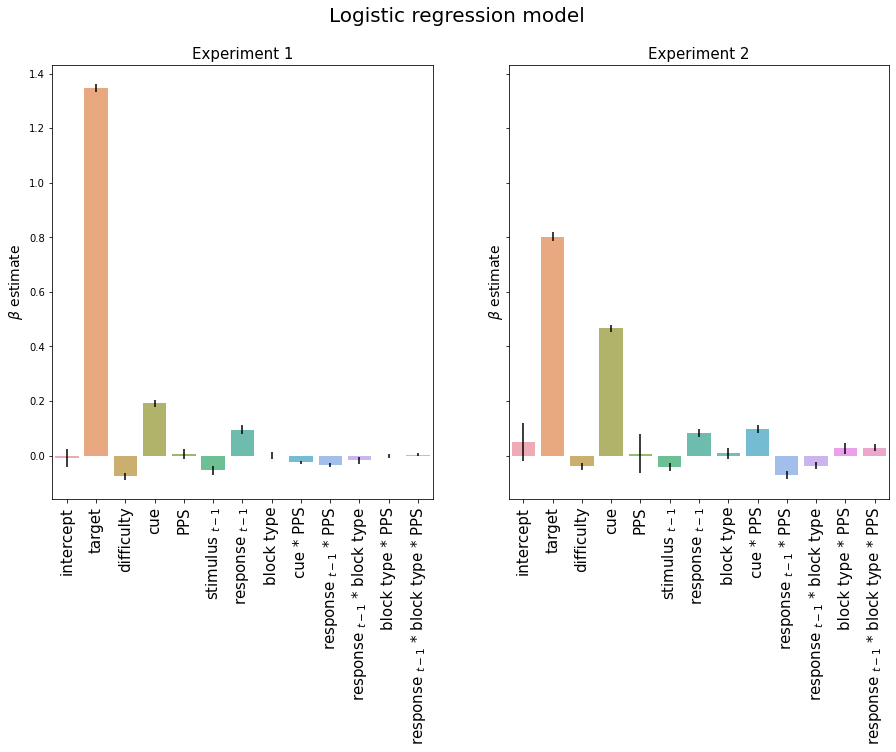

In [8]:
fig, axs = plt.subplots(1,2, figsize=(15,8), sharey=True)

plt.suptitle('Logistic regression model', fontsize=20)

xticklabels = ['intercept', 'target', 'difficulty', 'cue', 
              'PPS', 'stimulus $_{t-1}$', 'response $_{t-1}$', 'block type', 'cue * PPS', 
              'response $_{t-1}$ * PPS', 'response $_{t-1}$ * block type', 
              'block type * PPS', 'response $_{t-1}$ * block type * PPS']

axs[0].set_title('Experiment 1', fontsize=15)
sns.barplot('coef', 'Estimate', data=df_fix, yerr=df_fix['Std. Error'], ax=axs[0], alpha=0.8) # color = '#0A9094'
_=axs[0].set_xticklabels(xticklabels,rotation = 90, fontsize=15)


axs[1].set_title('Experiment 2', fontsize=15)
sns.barplot('coef', 'Estimate', data=df_fix_vis, yerr=df_fix_vis['Std. Error'], ax=axs[1], alpha=0.8) # , color='#D96923'
_=axs[1].set_xticklabels(xticklabels,rotation = 90, fontsize=15)

for ax in axs: 
    ax.set_xlabel(None)
    ax.set_ylabel(r'$\beta$ estimate', fontsize=14)
    
plt.savefig('r_results.svg')